In [2]:
# For this assignment I have referred to only one book which is the Hands On Machine Learning Book.
# All the code has been written by me and not copied from anywhere.     

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

df=pd.read_csv(r"./data/MaterialStrength_Train.csv")


In [3]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Now let us take a look at the data
print(df.head())

   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  Material Strength  
0            1040.0            676.0   28              79.99  
1            1055.0            676.0   28              61.89  
2             932.0            594.0  270              40.27  
3             932.0            594.0  365              41.05  
4             978.4            825.5  360              44.30  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              800 non-null    float64
 1   blast_furnace_slag  800 non-null    float64
 2   fly_ash             800 non-null    float64
 3   water               800 non-null    float64
 4   superplasticizer    800 non-null    float64
 5   coarse_aggregate    800 non-null    float64
 6   fine_aggregate      800 non-null    float64
 7   age                 800 non-null    int64  
 8   Material Strength   800 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 56.4 KB
None


In [6]:
# As we can see that there are no na value and all the value are of numerical type.
print(df.describe())

           cement  blast_furnace_slag    fly_ash      water  superplasticizer  \
count  800.000000          800.000000  800.00000  800.00000        800.000000   
mean   292.533625           67.819125   47.81125  179.77925          5.693500   
std    103.719988           86.017377   61.53907   22.18845          6.264438   
min    102.000000            0.000000    0.00000  121.80000          0.000000   
25%    212.100000            0.000000    0.00000  162.00000          0.000000   
50%    277.050000           19.000000    0.00000  184.00000          5.250000   
75%    374.000000          129.800000  117.50000  192.00000         10.200000   
max    540.000000          359.400000  174.70000  228.00000         32.200000   

       coarse_aggregate  fine_aggregate         age  Material Strength  
count        800.000000       800.000000  800.00000         800.000000  
mean         985.551875       778.426250   49.69625          36.654187  
std           72.783248        82.670454   69.13960

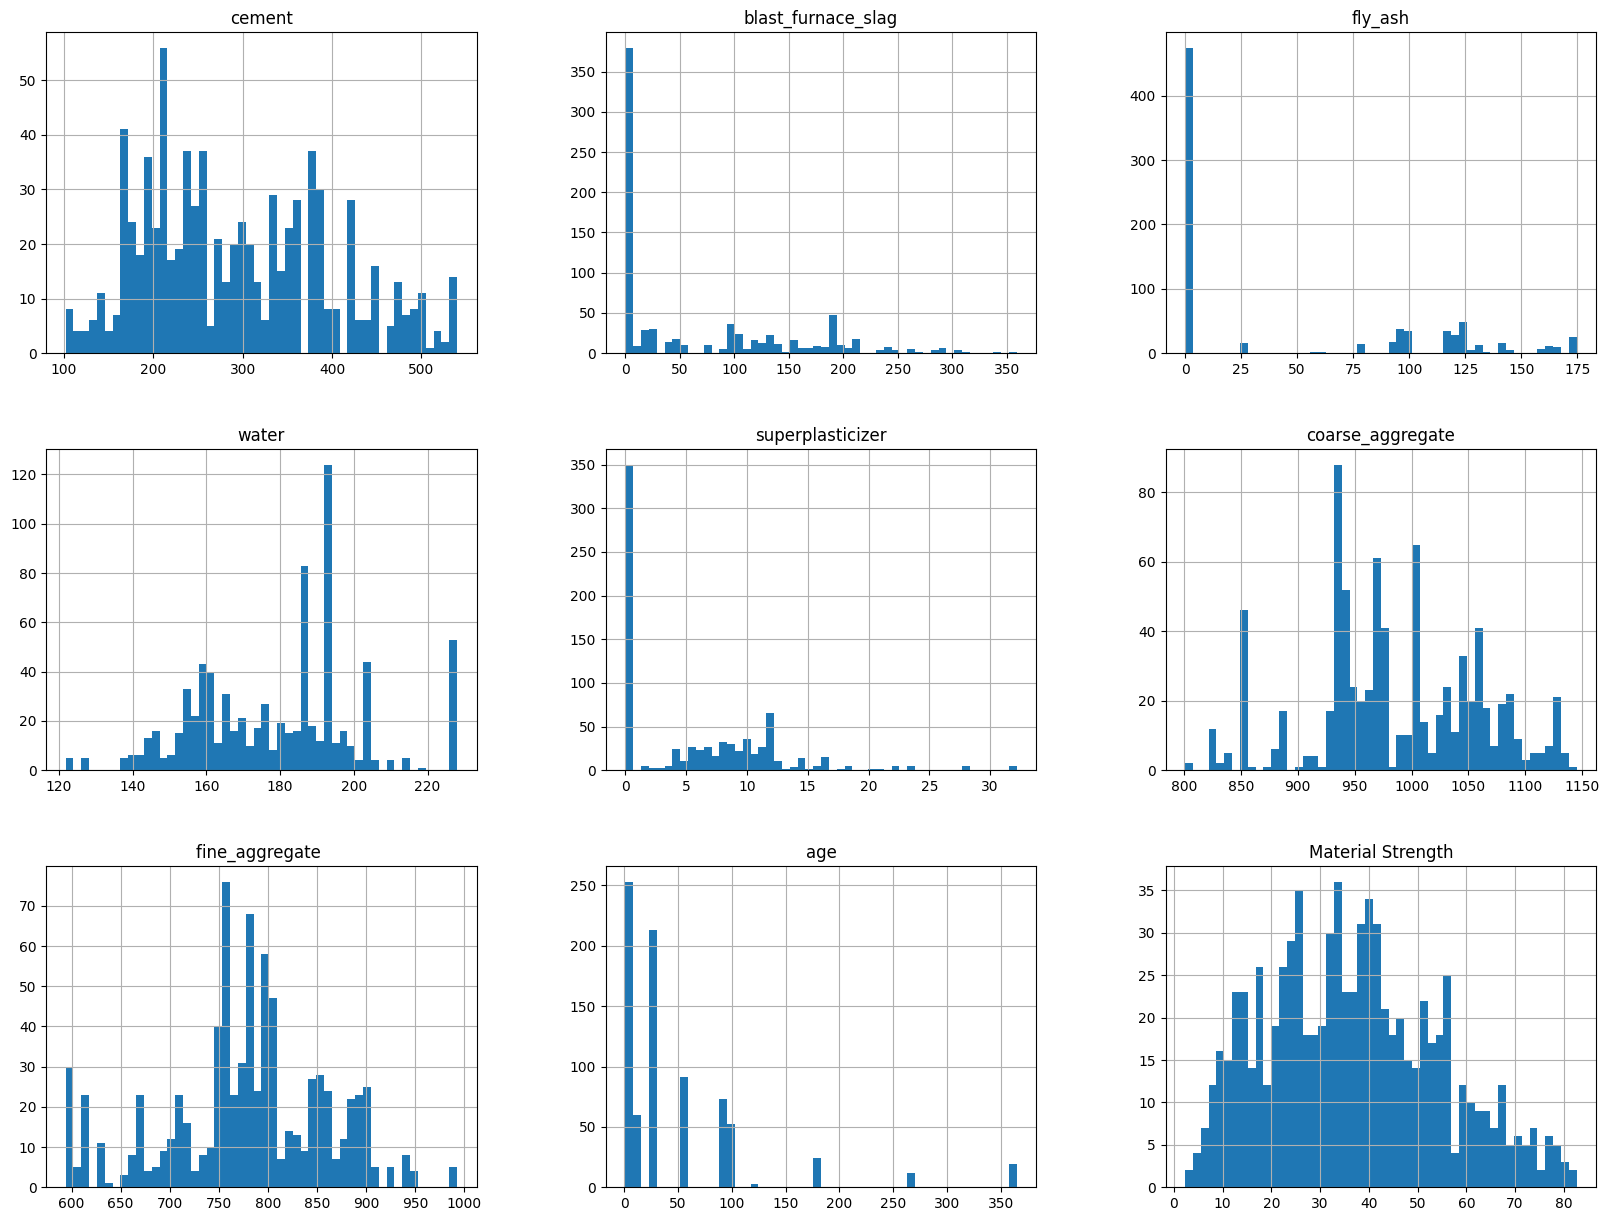

In [7]:
# Now let us see the distribution of all the attributes
df.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
# Now let us separate our data into train and test sets. We will put 20% of uour data as test set and the rest as train set. To do this we wil
# randomly select 160 points to create our test set.

# import random
# l=set()
# while len(l)<160:
#     l.add(int(random.random()*800))
# l=list(l)

# test=pd.DataFrame()
# train=pd.DataFrame()
# test=df.iloc[l].reset_index()
# test.drop(['index'],axis=1,inplace=True)
# train=df.drop(l).reset_index()
# train.drop(['index'],axis=1,inplace=True)

# The above code that i wrote selects the 160 points randomly every time we run. To avoid that we have use the already existing 
# train_test_split function sklearn

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=105)

print(test)




     cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
465   173.8                93.4    159.9  172.3               9.7   
130   323.7               282.8      0.0  183.8              10.3   
531   436.0                 0.0      0.0  218.0               0.0   
560   220.8               147.2      0.0  185.7               0.0   
334   275.1                 0.0    121.4  159.5               9.9   
..      ...                 ...      ...    ...               ...   
206   212.1                 0.0    121.6  180.3               5.7   
45    427.5                47.5      0.0  228.0               0.0   
419   165.0                 0.0    143.6  163.8               0.0   
565   295.8                 0.0      0.0  185.7               0.0   
490   387.0                20.0     94.0  157.0              11.6   

     coarse_aggregate  fine_aggregate   age  Material Strength  
465            1007.2            746.6  100              50.94  
130             942.7            659.9   

In [9]:
# Now let us calculate the mean square error of the test and train data

X=np.array(train.drop(['Material Strength'],axis=1))
y=np.array(train['Material Strength'])

# scaler.fit(X)
# X=scaler.transform(X)

X_b=np.c_[np.ones((640,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

from sklearn.metrics import mean_squared_error

predicted_value=np.array(test['Material Strength'])

y_b=np.c_[np.ones((160,1)),np.array(test.drop('Material Strength',axis=1))]

actual_value=y_b.dot(theta_best.T)

tesmse = mean_squared_error(actual_value, predicted_value)
pre=train['Material Strength']
act=np.c_[np.ones((640,1)),np.array(train.drop('Material Strength',axis=1))].dot(theta_best.T)
tramse=mean_squared_error(act,pre)


print(tramse,tesmse)

119.49981187530838 119.04393954237544


In [10]:
tr=train.copy()

In [11]:
# now let us find the standard correlation coeficeint wrt Material Strength

cm=tr.corr()
print(cm['Material Strength'].sort_values(ascending=False))

Material Strength     1.000000
cement                0.479709
superplasticizer      0.446107
age                   0.345970
blast_furnace_slag    0.150975
fly_ash              -0.029173
coarse_aggregate     -0.206513
fine_aggregate       -0.217390
water                -0.289392
Name: Material Strength, dtype: float64


array([[<Axes: xlabel='cement', ylabel='cement'>,
        <Axes: xlabel='superplasticizer', ylabel='cement'>,
        <Axes: xlabel='age', ylabel='cement'>,
        <Axes: xlabel='water', ylabel='cement'>,
        <Axes: xlabel='Material Strength', ylabel='cement'>],
       [<Axes: xlabel='cement', ylabel='superplasticizer'>,
        <Axes: xlabel='superplasticizer', ylabel='superplasticizer'>,
        <Axes: xlabel='age', ylabel='superplasticizer'>,
        <Axes: xlabel='water', ylabel='superplasticizer'>,
        <Axes: xlabel='Material Strength', ylabel='superplasticizer'>],
       [<Axes: xlabel='cement', ylabel='age'>,
        <Axes: xlabel='superplasticizer', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='water', ylabel='age'>,
        <Axes: xlabel='Material Strength', ylabel='age'>],
       [<Axes: xlabel='cement', ylabel='water'>,
        <Axes: xlabel='superplasticizer', ylabel='water'>,
        <Axes: xlabel='age', ylabel='water'>,
       

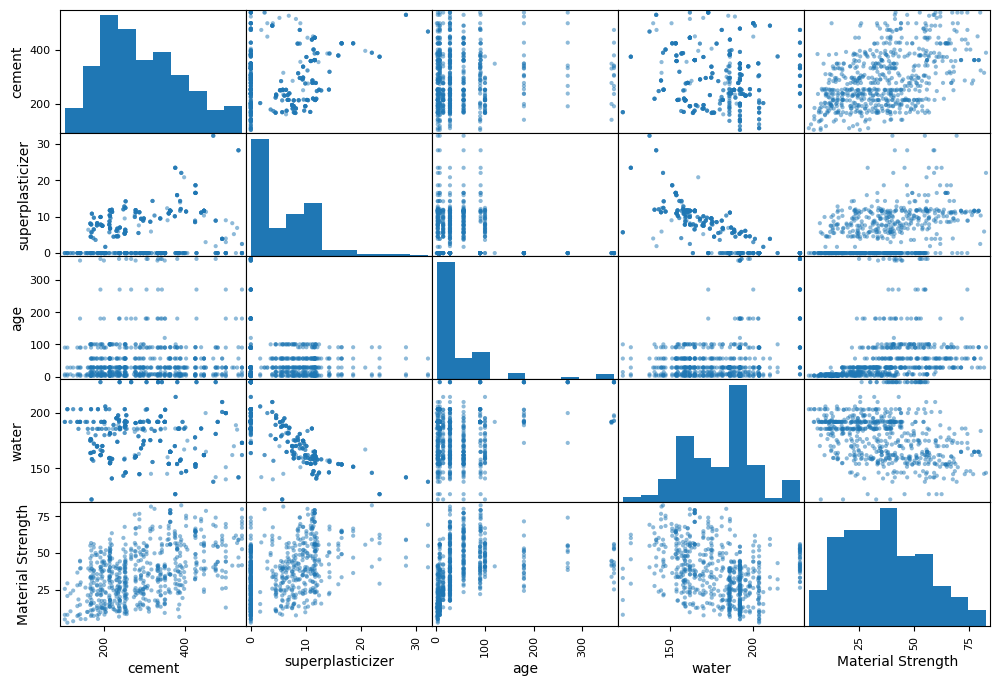

In [12]:
# Now we will use the pandas scatter_matrix function to visualise some strongly related attribute

from pandas.plotting import scatter_matrix

att=['cement','superplasticizer','age','water','Material Strength']
scatter_matrix(tr[att], figsize=(12, 8))

In [13]:
# From the above graph betwee Material Strength and other attributes we can see that water, cement and super plasticizer are strongly 
# correlated.

# Here we will transform and create some new attributes with high corelation to material strength.
# We will take th square root of age and create new attributes by multipling and dividing existing ones.


import math

tr['w/c']=tr.cement/tr.water
tr['coarse/fine']=tr['coarse_aggregate']*tr['fine_aggregate ']
tr['age']=tr['age'].apply(lambda x: math.sqrt(x))

print(tr.head())

     cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
55    198.6               132.4      0.0  192.0               0.0   
248   238.1                 0.0     94.1  186.7               7.0   
482   446.0                24.0     79.0  162.0              11.6   
510   424.0                22.0    132.0  178.0               8.5   
413   173.8                93.4    159.9  172.3               9.7   

     coarse_aggregate  fine_aggregate         age  Material Strength  \
55              978.4            825.5   2.645751              14.64   
248             949.9            847.0  10.000000              44.30   
482             967.0            712.0   7.483315              56.14   
510             822.0            750.0   2.645751              39.00   
413            1007.2            746.6   1.732051              15.82   

          w/c  coarse/fine  
55   1.034375    807669.20  
248  1.275308    804565.30  
482  2.753086    688504.00  
510  2.382022    616500.00  
413  1.

In [14]:
cn=tr.corr()
print(cn['Material Strength'])

cement                0.479709
blast_furnace_slag    0.150975
fly_ash              -0.029173
water                -0.289392
superplasticizer      0.446107
coarse_aggregate     -0.206513
fine_aggregate       -0.217390
age                   0.498677
Material Strength     1.000000
w/c                   0.545513
coarse/fine          -0.348656
Name: Material Strength, dtype: float64


In [15]:
# Now let us find the optimal parameters by finding the coiefficeint matrix


X=np.array(tr.drop(['Material Strength'],axis=1))
y=np.array(tr['Material Strength'])



X_b=np.c_[np.ones((640,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)



[ 8.52713019e+01  1.39983027e-01  9.56007950e-02  7.74436812e-02
 -2.55019774e-01  3.44544092e-01 -7.18481915e-02 -9.97621790e-02
  2.68449480e+00 -5.27752762e+00  1.11720838e-04]


In [16]:
# The equation for the response variable is

#            y= 43 + 0.1097*cement + 0.1013*blast_furnace_slag + 0.086*fly_ash - 0.174*water + 0.296*superplasticizer - 0.0544*coarse_aggregate - 0.074*fine_aggregate +2.778*age + 1.17*(w/c) 
#               + 9.6*(10^-5)*(coarse/fine)

# From the above equation we can see that can have the most significant change in the response variable are the ones which have the biggest 
# coieffecents. The variables with the biggest coeifficents are the one that we transformed (age) and one that we created (w/c).


In [17]:
# Here we are adding the new attributes to our train and test data

test['w/c']=test.cement/test.water
test['coarse/fine']=test['coarse_aggregate']*test['fine_aggregate ']
test['age']=test['age'].apply(lambda x: math.sqrt(x))

train['w/c']=train.cement/train.water
train['coarse/fine']=train['coarse_aggregate']*train['fine_aggregate ']
train['age']=train['age'].apply(lambda x: math.sqrt(x))


In [18]:
# Now let us see the mean square error for this model

from sklearn.metrics import mean_squared_error

predicted_value=np.array(test['Material Strength'])
test_arr=np.array(test.drop('Material Strength',axis=1))
y_b=np.c_[np.ones((160,1)),np.array(test.drop('Material Strength',axis=1))]

actual_value=y_b.dot(theta_best.T)

tesmse = mean_squared_error(actual_value, predicted_value)
pre=train['Material Strength']
act=np.c_[np.ones((640,1)),np.array(train.drop('Material Strength',axis=1))].dot(theta_best.T)
tramse=mean_squared_error(act,pre)


print(tramse,tesmse)

77.60623732142858 79.64395154406559


In [19]:
# Now using the OLS library, we will study the statistical properties of our model.

import statsmodels.api as sm

a=train['Material Strength']
b=train.drop('Material Strength',axis=1)

result=sm.OLS(a,b).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:      Material Strength   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1273.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):                        0.00
Time:                        17:03:33   Log-Likelihood:                         -2302.1
No. Observations:                 640   AIC:                                      4624.
Df Residuals:                     630   BIC:                                      4669.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [23]:
# Let us now perform Gradeint Decent.
# We know that theta_next = theta - n*d(MSE) and d(MSE) = (2/m)*X^T*(X*theta-y)
# Let us first start with a random theta 
# Before we start the gradient decent we need to scale the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(X_b)
# scaled_y=scaler.fit_transform(y)


n=0.001 # Learning rate
m=640
n_iterations=1000

theta=np.random.randn(11,1)

y_t=y.reshape(640,1)

loss_curve=[]
validation_curve=[]

for iterations in range(n_iterations):
    er= y_t - scaled_x.dot(theta)
    grad = 2/m * (scaled_x.T).dot(scaled_x.dot(theta) - y_t)
    theta =  theta - (n * grad) 
    loss=np.mean(er**2)
    loss_curve.append(loss)
    v_loss=np.mean((y_b.dot(theta)-predicted_value)**2)
    validation_curve.append(v_loss)
    print(grad)

# fig=px.line(loss_curve)
# fig.update_xaxes(title='Iterations')
# fig.update_yaxes(title='Loss')
# # fig.show()
    




[[  0.        ]
 [-18.38052689]
 [ -6.69865143]
 [  1.61598604]
 [ 10.22930093]
 [-16.74964981]
 [  9.68869343]
 [  8.19844667]
 [-16.16964877]
 [-20.69505791]
 [ 14.39971011]]
[[  0.        ]
 [-18.27303134]
 [ -6.67853199]
 [  1.58731194]
 [ 10.19783401]
 [-16.68075451]
 [  9.63080371]
 [  8.15708165]
 [-16.13807974]
 [-20.58261584]
 [ 14.32040281]]
[[  0.        ]
 [-18.16613854]
 [ -6.65851166]
 [  1.55884821]
 [ 10.16647479]
 [-16.61216086]
 [  9.5732336 ]
 [  8.11595105]
 [-16.10659367]
 [-20.47077932]
 [ 14.24153872]]
[[  0.        ]
 [-18.05984517]
 [ -6.63858982]
 [  1.5305935 ]
 [ 10.13522292]
 [-16.54386749]
 [  9.51598136]
 [  8.07505347]
 [-16.07519021]
 [-20.35954511]
 [ 14.16311532]]
[[  0.        ]
 [-17.95414795]
 [ -6.6187659 ]
 [  1.50254649]
 [ 10.1040781 ]
 [-16.47587303]
 [  9.45904525]
 [  8.03438754]
 [-16.043869  ]
 [-20.24890998]
 [ 14.0851301 ]]
[[  0.        ]
 [-17.84904358]
 [ -6.59903931]
 [  1.47470582]
 [ 10.07303997]
 [-16.4081761 ]
 [  9.40242354]
 [ 

In [ ]:
fig=px.line(validation_curve)
fig.update_xaxes(title='Iteration')
fig.update_yaxes(title='Loss')
fig.show()

In [ ]:
# Now we will use KNN approach.

k=12
cor=list(cn['Material Strength'])
cor.pop(8)
cor=np.array([0,0,0,0,0,0,0,1,1,0])
cor=cor*cor
print(cor)


def knn(a):
    dist=[]
    for i in range(640):
        r=X[i]-a 
        r=r*cor
        dist.append((r.dot(r),y[i]))
    dist.sort()
    su=0
    for i in range(k):
        su+=dist[i][1]
    return su/k

test_pre=[]   
for i in range(160):
    test_pre.append(knn(test_arr[i]))
test_pre=np.array(test_pre)

print(mean_squared_error(test_pre,predicted_value))



# After playing with the value of k we found that the mse increases as we increase the value of k. It validation accuracy is much lower than 
# parametric approaches.

[0 0 0 0 0 0 0 1 1 0]
80.25286180121527


In [ ]:
# Now let us use some GML regressions for our model

# We will first try Poisson regression

from sklearn import linear_model
clf = linear_model.PoissonRegressor()
clf.fit(scaled_x,y)
y_poisson=clf.predict(scaled_x)

print(mean_squared_error(y_poisson,y))

97.4696366248508


In [ ]:
# Now let us try gaussian regression

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
scaled_test=scaler.fit_transform(y_b)
kernel = DotProduct() + WhiteKernel()
lasso_reg = GaussianProcessRegressor(kernel=kernel,random_state=0)
lasso_reg.fit(scaled_x, y)
y_lass=lasso_reg.predict(scaled_test)
print(mean_squared_error(y_lass,predicted_value))


82.37655453756567


In [ ]:
# Now we will 